I found help and adapted code from: [Implementation of Gradient Ascent using Logistic Regression](https://vasugupta2000.medium.com/implementation-of-gradient-ascent-using-logistic-regression-7f5343877c21) and github.com/arb17b/.

Finding lambdas was somewhat difficult (trial and error). I tried implementing GLMNET but it was unsuccessful.

In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [15, 10]
from tabulate import tabulate
print("Setup Complete")

Setup Complete


### Premise

Implement the TISP variable selection method for classification with the hard-thresholding penalty (with $\eta = 0$). Take special care to __normalize each column__ of
the $X$ matrix to have zero mean and variance 1 and to use the same mean and standard deviation that you used for normalizing the train set also for normalizing the test set.

Using the Gisette data, train a TISP classifier on the training set, starting with $w(0) = 0$, with 100 iterations. Find appropriate $\lambda - s$ to select approximately
10, 30, 100, 300, 1000 features. 
-  Plot the train misclassification error vs iteration number when selecting 300 features. 
-  Plot the final train and test misclassification error vs the number of selected features. 
-  Report in a table these misclassification errors on the training and test set, the corresponding numbers of selected features and the values of $\lambda$.

In [33]:
x_raw = pd.read_csv ("C:/Users/.../Dexter/dexter_train.csv",delimiter =",", header = None)
y_raw = np.genfromtxt ("C:/Users/.../Dexter/dexter_train.labels")
xt_raw = pd.read_csv ("C:/Users/.../Dexter/dexter_valid.csv",delimiter =",", header = None)
yt_raw = np.genfromtxt ("C:/Users/.../Dexter/dexter_valid.labels")

In [34]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_raw)
x_test = scaler.fit_transform(xt_raw)
y_train = np.where(y_raw == -1, 0, y_raw)
y_test = np.where(yt_raw == -1, 0, yt_raw)
# y_train = (y_raw[0] != -1) * 1
# y_test = (yt_raw[0] != -1) * 1

# Numpy version issue with float parameter not being recognized. 
np.float = float    
np.int = int   #module 'numpy' has no attribute 'int'
np.object = object    #module 'numpy' has no attribute 'object'
np.bool = bool    #module 'numpy' has no attribute 'bool'

In [35]:
def sigmoid(scores):
    idx = scores > 0
    out = np.empty(scores.size, dtype=np.float)
    out[idx] = 1. / (1 + np.exp(-scores[idx]))
    exp_scores = np.exp(scores[~idx])
    out[~idx] = exp_scores / (1. + exp_scores)
    return out

def penalized_logistic_regression(features, target, lamda, add_intercept=False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
    w = np.zeros(features.shape[1])
    for step in range(100):
        z = np.dot(features, w)
        predictions = sigmoid(z)
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        w += gradient/features.shape[0]
    for col in range(w.shape[0]):
        if np.abs(w[col])> lamda:
            w[col] = w[col]
        else:
            w[col] = 0
    return w

In [36]:
w = penalized_logistic_regression(x_train, y_train, 0.13, add_intercept=False)
np.count_nonzero(w)
e_train = np.dot(x_train, w)
preds = np.round(sigmoid(e_train))

l = [0.13, 0.1, 0.069, 0.05, 0.038]

train_results = []
test_results = []
number_of_features =[]
for lamda in l:
    w = penalized_logistic_regression(x_train, y_train, lamda, add_intercept=False)
    e_test = np.dot(x_test, w)
    preds = np.round(sigmoid(e_test))
    error = np.sum((preds != y_test) * 1) / preds.shape[0]
    test_results.append(error)
    
    e_train = np.dot(x_train, w)
    y_pred = np.round(sigmoid(e_train))
    error = np.sum((y_pred != y_train) * 1) / y_pred.shape[0]
    train_results.append(error)
    n_features = np.count_nonzero(w)
    number_of_features.append(n_features)

Text(0.5, 1.0, 'Dataset | Dexter')

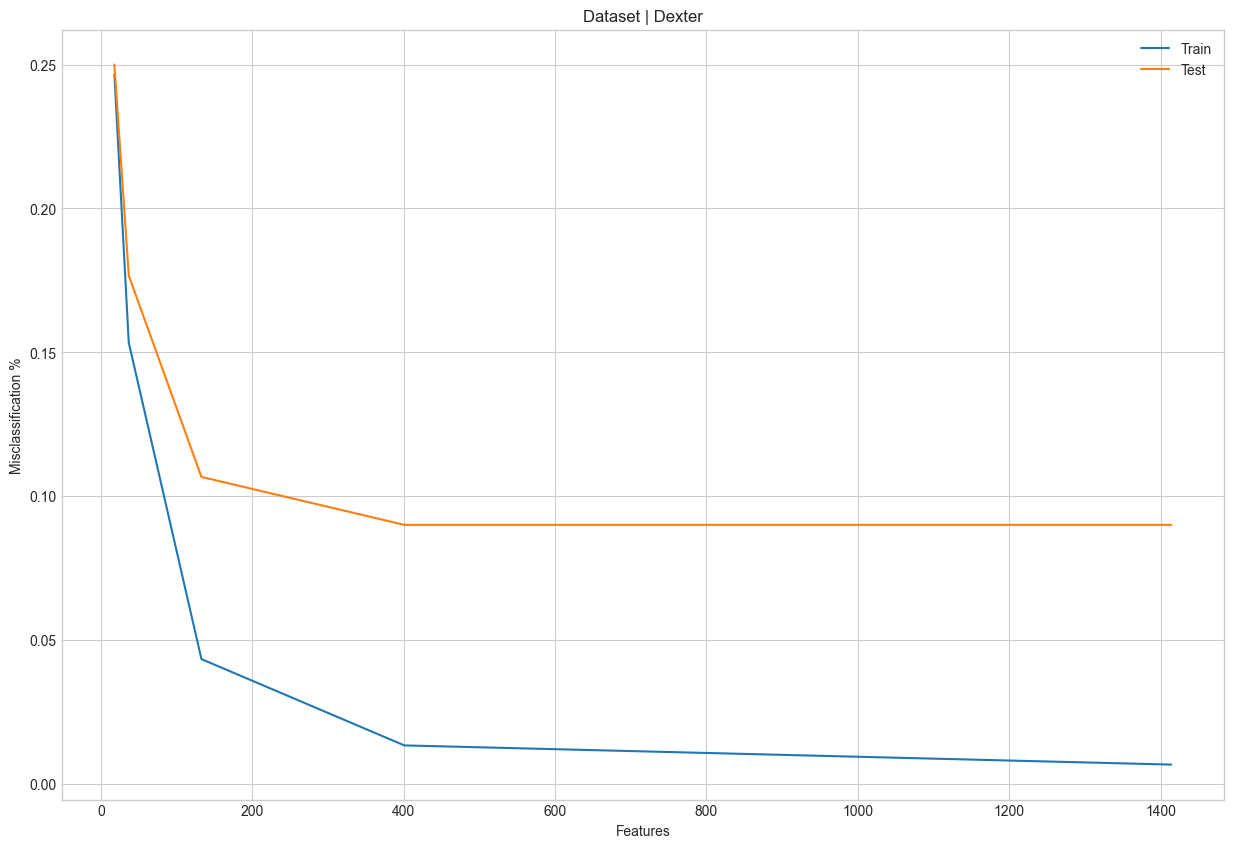

In [37]:
plt.plot(number_of_features, train_results, label= "Train")
plt.plot(number_of_features, test_results, label= "Test")
plt.legend()
plt.ylabel("Misclassification %")
plt.xlabel("Features")
plt.title("Dataset | Dexter")

In [38]:
headers = ['Lambda','# Features','Train Error', 'Test Error']
table_sqrt = zip(l,number_of_features,train_results,test_results)
print(tabulate(table_sqrt,headers=headers,tablefmt='fancy_grid'))

╒══════════╤══════════════╤═══════════════╤══════════════╕
│   Lambda │   # Features │   Train Error │   Test Error │
╞══════════╪══════════════╪═══════════════╪══════════════╡
│    0.13  │           18 │    0.246667   │     0.25     │
├──────────┼──────────────┼───────────────┼──────────────┤
│    0.1   │           37 │    0.153333   │     0.176667 │
├──────────┼──────────────┼───────────────┼──────────────┤
│    0.069 │          133 │    0.0433333  │     0.106667 │
├──────────┼──────────────┼───────────────┼──────────────┤
│    0.05  │          401 │    0.0133333  │     0.09     │
├──────────┼──────────────┼───────────────┼──────────────┤
│    0.038 │         1414 │    0.00666667 │     0.09     │
╘══════════╧══════════════╧═══════════════╧══════════════╛
